<a href="https://colab.research.google.com/github/manishiitg/ML_Experments/blob/master/ml/PCA%2C_t_sine_data_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PCA and t-sine are different methods to reduce dimentions of data but still trying to keep the original meaning. When working with deep learning models or even word embeddings in NLP we are dealing with large vectors. It's not possible to visualize this data, our brain is not capable of visualizing in more than 3 dimention vector space but with ML we are working on much large vector space like 100D or 300D as well. Hence we need methods to reduce the dimenstions of data but still able to keep the intrensic meaning of the data intarct. PCA/t-sine are same of the basic and easy to use methods for doing so.
Lets see them in practice  

In [5]:
import spacy 
nlp = spacy.load("en_core_web_sm")

from sklearn.feature_extraction.text import TfidfVectorizer

import matplotlib.pyplot as plt


from sklearn.datasets import fetch_20newsgroups

def normalize(comment, lowercase=True, remove_stopwords=True):
    if lowercase:
        comment = comment.lower()
    lines = comment.splitlines()
    lines = [x.strip(' ') for x in lines]
    lines = [x.replace('"', '') for x in lines]
    lines = [x.replace('\\"', '') for x in lines]
    lines = [x.replace(u'\xa0', u'') for x in lines]
    comment = " ".join(lines)
    doc = nlp(comment)

    # for token in doc:
    #   print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
    #     token.shape_, token.is_alpha, token.is_stop)

    words = [token for token in doc if token.is_stop !=
             True and token.is_punct != True]
    # return " ".join(words)
    lemmatized = list()
    for word in words:
        lemma = word.lemma_.strip()
        if lemma:
            lemmatized.append(lemma)
    return " ".join(lemmatized)

news = fetch_20newsgroups(subset="train")

print("size of data: " , len(news["data"]))

data_to_process = news["data"][:100]

clean_data  = []


print("cleaning data")
for row in data_to_process:
  clean_data.append(normalize(row))

print("data cleaned")

tfidf_vectorizer = TfidfVectorizer()  

tfidf_vectorizer.fit(clean_data)

Xtr = tfidf_vectorizer.transform(clean_data)

features = tfidf_vectorizer.get_feature_names()

print("vector space size :", Xtr.todense().shape[0],"D")



size of data:  11314
cleaning data
data cleaned
vector space size : 100 D


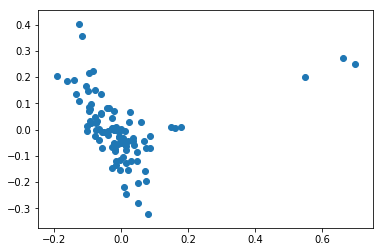

In [0]:
# https://stackoverflow.com/questions/28160335/plot-a-document-tfidf-2d-graph

from sklearn.decomposition import PCA

X = Xtr.todense()

pca = PCA(n_components=2).fit(X)
data2D = pca.transform(X)

plt.scatter(data2D[:,0], data2D[:,1])
# plt.show()              #not required if using ipython notebook


Reducing 100D to 2D and plotting it 

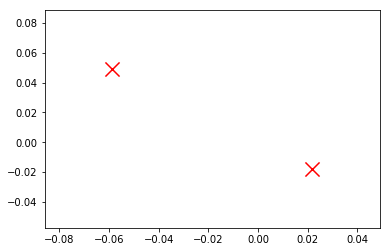

In [0]:

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2).fit(X)
centers2D = pca.transform(kmeans.cluster_centers_)

plt.scatter(centers2D[:,0], centers2D[:,1], 
            marker='x', s=200, linewidths=3, c='r')

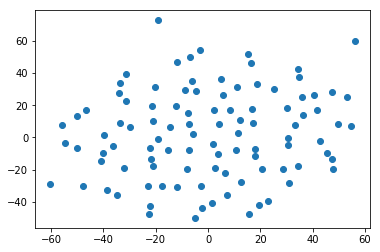

In [0]:
# t-SNE plot
from sklearn.manifold import TSNE

embeddings = TSNE(n_components=2)
Y = embeddings.fit_transform(X)
plt.scatter(Y[:, 0], Y[:, 1], cmap=plt.cm.Spectral)
# plt.show()

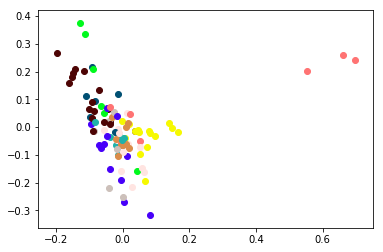

In [0]:
# https://stackoverflow.com/questions/27494202/how-do-i-visualize-data-points-of-tf-idf-vectors-for-kmeans-clustering



num_clusters = 10
num_seeds = 10
max_iterations = 300
labels_color_map = {
    0: '#20b2aa', 1: '#ff7373', 2: '#ffe4e1', 3: '#005073', 4: '#4d0404',
    5: '#ccc0ba', 6: '#4700f9', 7: '#f6f900', 8: '#00f91d', 9: '#da8c49'
}
pca_num_components = 2
tsne_num_components = 2

# tf_idf_vectorizer = TfidfVectorizer(analyzer="word", use_idf=True, smooth_idf=True, ngram_range=(2, 3))
# tf_idf_matrix = tf_idf_vectorizer.fit_transform(texts_list)


# create k-means model with custom config
clustering_model = KMeans(
    n_clusters=num_clusters,
    max_iter=max_iterations,
    precompute_distances="auto",
    n_jobs=-1
)

labels = clustering_model.fit_predict(Xtr)
# print labels

# ----------------------------------------------------------------------------------------------------------------------

reduced_data = PCA(n_components=pca_num_components).fit_transform(X)
# print reduced_data

fig, ax = plt.subplots()
for index, instance in enumerate(reduced_data):
    # print instance, index, labels[index]
    pca_comp_1, pca_comp_2 = reduced_data[index]
    color = labels_color_map[labels[index]]
    ax.scatter(pca_comp_1, pca_comp_2, c=color)
# plt.show()

